### Logistic regression for income prediction

The library contains several special classes for linear models, e.g., `LogisticRegression` for classification tasks and `LinearRegression` for regression tasks. These classes provide a special method `explain` for generating both global explanations (linear coefficients) and local explanations (feature importance scores). One may apply these classes directly if using a linear model.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import os
import unittest
import pprint
import sklearn
import sklearn.datasets
import sklearn.ensemble

import numpy as np
import pandas as pd
from omnixai.data.tabular import Tabular
from omnixai.explainers.tabular import LogisticRegression

The dataset used in this example is for income prediction (https://archive.ics.uci.edu/ml/datasets/adult). For linear models, we use `Tabular` to represent a tabular dataset, which can be constructed from a pandas dataframe or a numpy array. To create a `Tabular` instance given a numpy array, one needs to specify the data, the feature names, the categorical feature names (if exists) and the target/label column name (if exists).

In [3]:
feature_names = [
    "Age", "Workclass", "fnlwgt", "Education",
    "Education-Num", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country", "label"
]
data = np.genfromtxt(os.path.join('../data', 'adult.data'), delimiter=', ', dtype=str)
tabular_data = Tabular(
    data,
    feature_columns=feature_names,
    categorical_columns=[feature_names[i] for i in [1, 3, 5, 6, 7, 8, 9, 13]],
    target_column='label'
)

To train the linear model, the method `fit` is called with the training dataset (a `Tabular` instance).

In [4]:
np.random.seed(1)
model = LogisticRegression()
model.fit(tabular_data)

Validation accuracy: 0.8518347919545525


The linear model has both global explanations and local explanations generated by calling the method `explain`. 

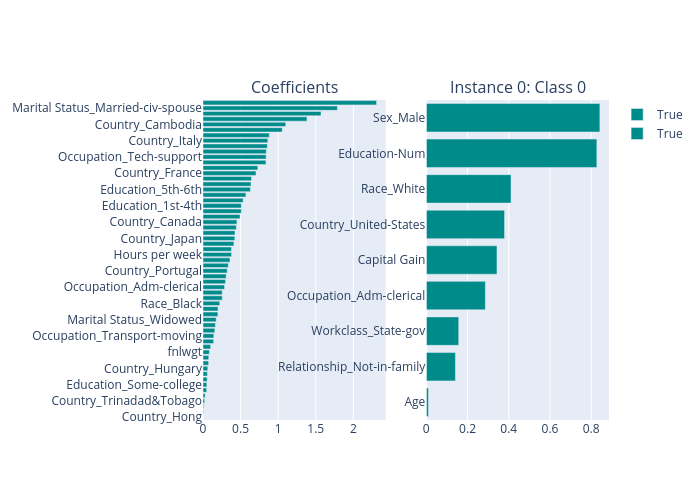

In [5]:
test_x = tabular_data[0:5]
explanations = model.explain(test_x)
explanations.ipython_plot(index=0)